# Assignment 2
By Sushaanth Srinivasan, SSNCE195001113

## 1. Download Dataset

### Mounting google drive to get Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Required Libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Image Augmentation

In [4]:
!ls "/content/drive/MyDrive/IBM Data/flowers"

daisy  dandelion  rose	sunflower  tulip


In [5]:
IMG_SHAPE = 128
IMG_FOLDER = "/content/drive/MyDrive/IBM Data/flowers"
BATCH_SIZE = 64

In [6]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0, shear_range=0.2, zoom_range=0.2, 
                                                          rotation_range=45, horizontal_flip=True, vertical_flip=True,
                                                          validation_split=0.2)

In [7]:
train = datagen.flow_from_directory(IMG_FOLDER, target_size=(IMG_SHAPE,IMG_SHAPE), color_mode='rgb',
                                    class_mode='categorical', batch_size=BATCH_SIZE,
                                    shuffle=True, subset='training')
test = datagen.flow_from_directory(IMG_FOLDER, target_size=(IMG_SHAPE,IMG_SHAPE), color_mode='rgb',
                                class_mode='categorical', batch_size=BATCH_SIZE,
                                shuffle=False, subset='validation')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


## 3. Create the Model

In [8]:
model = tf.keras.models.Sequential()

## 4. Add Layers

In [9]:
model.add(tf.keras.layers.Input((IMG_SHAPE,IMG_SHAPE,3)))
model.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(128, 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                    

## 5. Compile the Model

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

## 6. Fit the Model

In [11]:
hist = model.fit(train, epochs=25)

Epoch 1/25
55/55 [==============================] - 830s 15s/step - loss: 1.5780 - accuracy: 0.2496
Epoch 2/25
55/55 [==============================] - 24s 439ms/step - loss: 1.4785 - accuracy: 0.3379
Epoch 3/25
55/55 [==============================] - 24s 438ms/step - loss: 1.3760 - accuracy: 0.4021
Epoch 4/25
55/55 [==============================] - 24s 444ms/step - loss: 1.2676 - accuracy: 0.4640
Epoch 5/25
55/55 [==============================] - 24s 438ms/step - loss: 1.1787 - accuracy: 0.5187
Epoch 6/25
55/55 [==============================] - 24s 437ms/step - loss: 1.1059 - accuracy: 0.5603
Epoch 7/25
55/55 [==============================] - 24s 435ms/step - loss: 1.0982 - accuracy: 0.5528
Epoch 8/25
55/55 [==============================] - 24s 436ms/step - loss: 1.0668 - accuracy: 0.5687
Epoch 9/25
55/55 [==============================] - 24s 442ms/step - loss: 1.0370 - accuracy: 0.5858
Epoch 10/25
55/55 [==============================] - 24s 442ms/step - loss: 1.0074 - accurac

# Save the Model

In [12]:
model.save("flower_classifier.h5")

# Test the Model

In [13]:
loss, acc = model.evaluate(test)
print(f"Loss Value for Test Data : {loss}")
print(f"Accuracy for Test Data : {acc}")

14/14 [==============================] - 194s 15s/step - loss: 0.9031 - accuracy: 0.6326
Loss Value for Test Data : 0.9030939936637878
Accuracy for Test Data : 0.6325581669807434


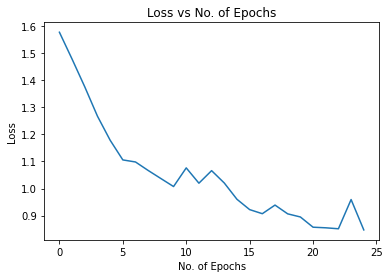

In [14]:
plt.plot(hist.history['loss'])
plt.title("Loss vs No. of Epochs")
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.show()

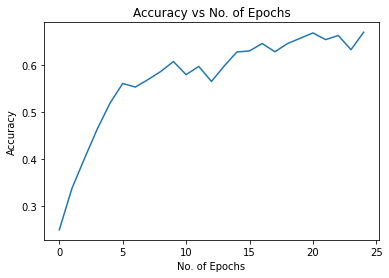

In [15]:
plt.plot(hist.history['accuracy'])
plt.title("Accuracy vs No. of Epochs")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.show()